The accurate determination of occupancy detection in buildingshas been recently estimated to save energy in the order of 30 to 42%. Experimental measurements reported that energy savingswas 37% in and between 29% and 80% when occupancy data was used as an input. 

The determination of occupancy a very promis-ing approach to lower energy consumption in buildings. 

Other applications for occupancy detection include security and determination of building occupant behaviors. A system that could accurately detect the presence of the occupants without using a camera is very interesting due to privacy concerns.

In [1]:
!pip install gcsfs

In [2]:
import pandas as pd
import gcsfs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.style
mpl.style.use('seaborn-bright')
%matplotlib inline

Reading data files from google cloud storage using gcsfs python package

In [3]:
fs = gcsfs.GCSFileSystem(project='omina-gcp-resource')
with fs.open('omina-test-set/occupancy-data/occupancy_data.csv') as f:
    df = pd.read_csv(f)

Reading data files from google cloud storage  using google datalab storage package

In [4]:
import google.datalab.storage as storage
import pandas as pd
from io import BytesIO

mybucket = storage.Bucket('omina-test-set')
data_csv = mybucket.object('occupancy-data/occupancy_data.csv')

uri = data_csv.uri
%gcs read --object $uri --variable data

df = pd.read_csv(BytesIO(data))
df['color']= np.where( df['Occupancy']==1, "limegreen", "blue")
df.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,color
0,1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1,limegreen
1,2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1,limegreen
2,3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1,limegreen
3,4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1,limegreen
4,5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1,limegreen


Converting date variavle to python datetime variable

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
del df['date']
del df['HumidityRatio']
del df['Unnamed: 0']
df.head()

,Temperature,Humidity,Light,CO2,Occupancy,color
date,,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,1,limegreen
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,1,limegreen
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,1,limegreen
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,1,limegreen
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,1,limegreen


In [6]:
print (df.index.min())
print (df.index.max())

2015-02-02 14:19:00
2015-02-18 09:19:00


Sub-plotting each variables to visualize the time-series patterns

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Copying file://data_explor.svg [Content-Type=image/svg+xml]...
/ [1 files][165.5 KiB/165.5 KiB]                                                
Operation completed over 1 objects/165.5 KiB.                                    


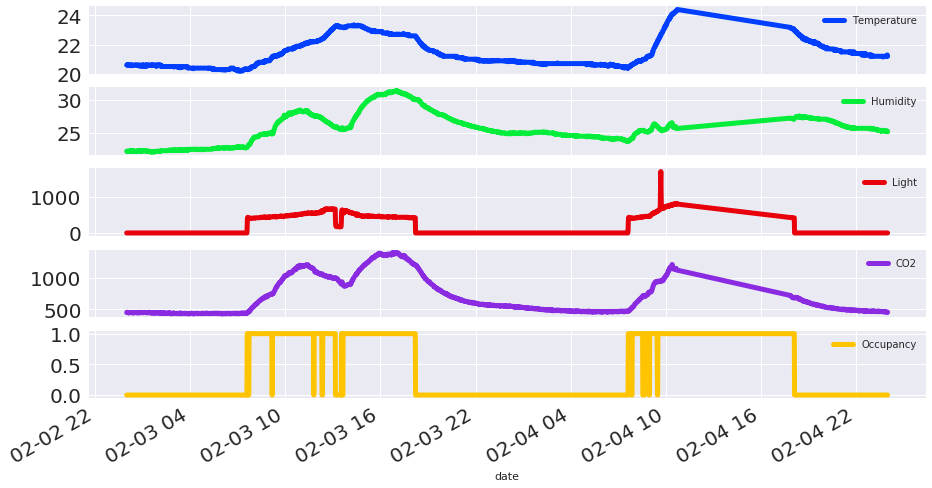

In [7]:
df['2015-02-03' : '2015-02-04'].plot(subplots=True, figsize=(15,8), linewidth=5, fontsize=20)
plt.legend(loc='best')
plt.savefig("data_explor.svg", format="svg")
!gsutil cp 'data_explor.svg' 'gs://omina-test-set/occupancy-data/data_explor.svg'

In [11]:
df1 = df['2015-02-12 07:00:00' : '2015-02-12 07:59:59']
print(len(df1[df1['Occupancy'] == 0]))

61


Pair plotting to see the scatter diagram for each pair of variables

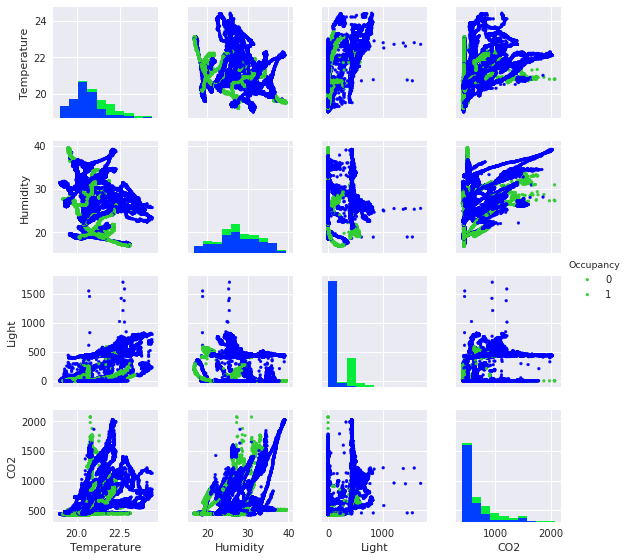

In [26]:
sns.set(style="white")
sns.set(color_codes=True)
sns.set_palette("bright", 2)
g = sns.pairplot(df,
                 hue="Occupancy",
                 size = 2,
                 plot_kws={"s": 8, 'alpha': 1, 'edgecolor': df['color'], 'facecolors':df['color']},
                 vars=["Temperature", "Humidity", "Light", "CO2"])


Correlation plot of variables

Copying file://data_corr.svg [Content-Type=image/svg+xml]...
/ [1 files][ 31.4 KiB/ 31.4 KiB]                                                
Operation completed over 1 objects/31.4 KiB.                                     


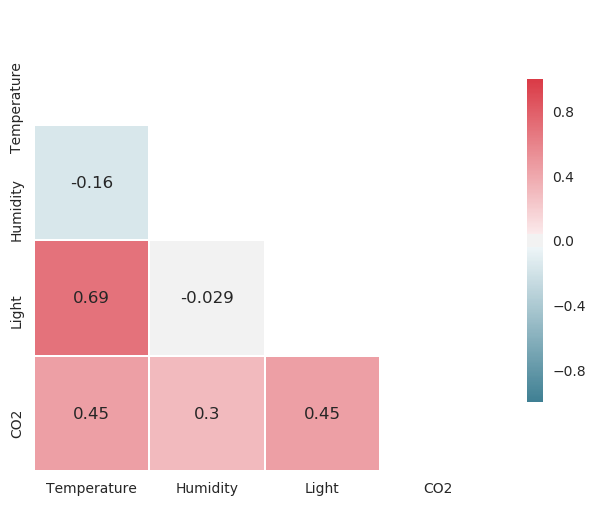

In [30]:
df1 = df[['Temperature', 'Humidity', 'Light', 'CO2']]
corr = df1.corr()
sns.set(style = "white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(8, 6))


cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

plt.savefig("data_corr.svg", format="svg")
!gsutil cp 'data_corr.svg' 'gs://omina-test-set/occupancy-data/data_corr.svg'

In [28]:
plt.rcParams.update(plt.rcParamsDefault)